# [ 코스피 지수와 취급액의 상관관계 분석 ]

In [1]:
import pandas as pd
import numpy as np

In [2]:
pf = pd.read_excel('performance.xlsx', header=1)
pf.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0


In [39]:
kospi = pd.read_excel('KOSPI.xls', dtype = {'현재지수': np.float64})
kospi.head()

,일자,현재지수,대비,등락률(%),배당수익률(%),주가이익비율,주가자산비율,시가지수,고가지수,저가지수,거래량(천주),거래대금(백만원),상장시가총액(백만원)
0,2019/01/02,2010.00,-31.04,-1.52,1.96,9.44,0.85,2050.55,"2,053.45","2,004.27","326,368","4,295,872","1,323,645,397"
1,2019/01/03,1993.70,-16.30,-0.81,1.97,9.36,0.85,"2,011.81","2,014.72","1,991.65","427,976","5,358,519","1,312,758,913"
2,2019/01/04,2010.25,16.55,0.83,1.96,9.44,0.85,"1,992.40","2,011.56","1,984.53","408,991","5,490,148","1,323,719,373"
3,2019/01/07,2037.10,26.85,1.34,1.93,9.57,0.87,"2,034.24","2,048.06","2,030.90","440,191","5,301,385","1,342,381,871"
4,2019/01/08,2025.27,-11.83,-0.58,1.94,9.52,0.86,"2,038.68","2,042.70","2,023.59","397,831","4,826,642","1,333,996,221"


## 1. 데이터 전처리

In [5]:
pf.loc[pf['노출(분)'].isnull(), '노출(분)'] = \
              pf.loc[pf['노출(분)'].isnull(), '방송일시'].map(pf.loc[pf['노출(분)'].notnull()]\
                                                      .set_index('방송일시')['노출(분)'])

In [6]:
pf = pf[pf['상품군']!='무형']
pf = pf[pf.취급액 != 50000]
pf.tail()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
38299,2019-12-31 23:40:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0
38300,2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0
38301,2020-01-01 00:00:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0
38302,2020-01-01 00:00:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000.0
38303,2020-01-01 00:00:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,46608000.0


In [21]:
profit = pf[['방송일시', '노출(분)', '취급액']]
profit['date'] = pf['방송일시'].map(lambda x: x.date())
profit = profit[['date', '노출(분)', '취급액']]
profit['date'] = profit['date'].map(lambda x: pd.to_datetime(x))
profit.head()

C:\ProgramData\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,노출(분),취급액
0,2019-01-01,20.0,2099000.0
1,2019-01-01,20.0,4371000.0
2,2019-01-01,20.0,3262000.0
3,2019-01-01,20.0,6955000.0
4,2019-01-01,20.0,6672000.0


In [29]:
profit = profit.groupby(by=['date'], as_index=False).sum()
profit.head()

,date,노출(분),취급액
0,2019-01-01,1240.0,2.712779e+09
1,2019-01-02,2037.1,2.011023e+09
2,2019-01-03,1857.1,2.062043e+09
3,2019-01-04,1657.1,2.049394e+09
4,2019-01-05,1934.2,2.588390e+09


In [48]:
def min_profit(pro, minute):
    return (pro/minute)/10000

In [49]:
profit['minprofit'] = profit.apply(lambda x : min_profit(x['취급액'], x['노출(분)']), axis=1)
profit.head()

,date,노출(분),취급액,취급액/노출,minprofit
0,2019-01-01,1240.0,2.712779e+09,2.187725e+06,218.772500
1,2019-01-02,2037.1,2.011023e+09,9.871990e+05,98.719896
2,2019-01-03,1857.1,2.062043e+09,1.110356e+06,111.035647
3,2019-01-04,1657.1,2.049394e+09,1.236735e+06,123.673526
4,2019-01-05,1934.2,2.588390e+09,1.338223e+06,133.822252


In [40]:
kospi['date'] = pd.to_datetime(kospi.일자)
kospi = kospi[['date', '현재지수']]
kospi.head()

,date,현재지수
0,2019-01-02,2010.00
1,2019-01-03,1993.70
2,2019-01-04,2010.25
3,2019-01-07,2037.10
4,2019-01-08,2025.27


In [51]:
kp = pd.merge(kospi, profit, on="date", how="outer")
kp.sort_values(by=['date'], axis=0, inplace=True)
kp = kp.iloc[:-1]
kp

,date,현재지수,노출(분),취급액,취급액/노출,minprofit
246,2019-01-01,NaN,1240.000000,2.712779e+09,2.187725e+06,218.772500
0,2019-01-02,2010.00,2037.100000,2.011023e+09,9.871990e+05,98.719896
1,2019-01-03,1993.70,1857.100000,2.062043e+09,1.110356e+06,111.035647
2,2019-01-04,2010.25,1657.100000,2.049394e+09,1.236735e+06,123.673526
247,2019-01-05,NaN,1934.200000,2.588390e+09,1.338223e+06,133.822252
...,...,...,...,...,...,...
244,2019-12-27,2204.21,1517.166667,2.378887e+09,1.567980e+06,156.798001
362,2019-12-28,NaN,1818.366667,2.706958e+09,1.488676e+06,148.867555
363,2019-12-29,NaN,1397.166667,2.706806e+09,1.937354e+06,193.735369
245,2019-12-30,2197.67,1257.166667,2.224920e+09,1.769789e+06,176.978921


장이 열리지 않는 주말의 코스피 지수는 1월 1일을 제외하고 이전 금요일 값으로 채워넣음

In [52]:
kp = kp.fillna(method='ffill')
kp = kp.fillna(method='bfill')
kp

,date,현재지수,노출(분),취급액,취급액/노출,minprofit
246,2019-01-01,2010.00,1240.000000,2.712779e+09,2.187725e+06,218.772500
0,2019-01-02,2010.00,2037.100000,2.011023e+09,9.871990e+05,98.719896
1,2019-01-03,1993.70,1857.100000,2.062043e+09,1.110356e+06,111.035647
2,2019-01-04,2010.25,1657.100000,2.049394e+09,1.236735e+06,123.673526
247,2019-01-05,2010.25,1934.200000,2.588390e+09,1.338223e+06,133.822252
...,...,...,...,...,...,...
244,2019-12-27,2204.21,1517.166667,2.378887e+09,1.567980e+06,156.798001
362,2019-12-28,2204.21,1818.366667,2.706958e+09,1.488676e+06,148.867555
363,2019-12-29,2204.21,1397.166667,2.706806e+09,1.937354e+06,193.735369
245,2019-12-30,2197.67,1257.166667,2.224920e+09,1.769789e+06,176.978921


In [53]:
kp['현재지수'] = kp['현재지수'].astype('float')

## 2. 상관관계 분석

### (1) 산점도

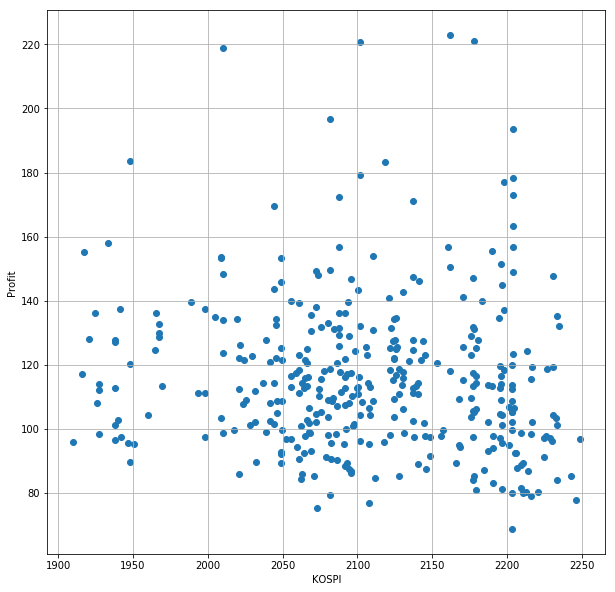

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

# 산점도 작성
plt.figure(figsize=(10, 10))         # 플롯 사이즈 지정
plt.scatter(kp.현재지수, kp.minprofit)       # 산점도
plt.xlabel("KOSPI")                    # x축 레이블 지정
plt.ylabel("Profit")                 # y축 레이블 지정
plt.grid()                           # 플롯에 격자 보이기
plt.show()                           # 플롯 보이기

### (2) pair plot

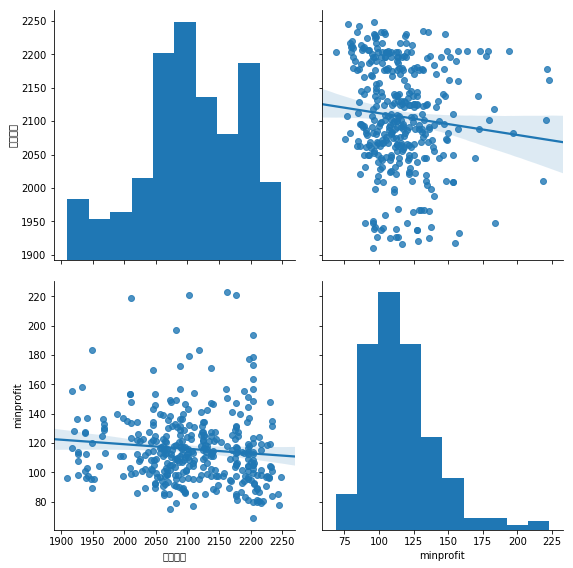

In [55]:
import seaborn as sns

pair = kp[['현재지수', 'minprofit']]
sns.pairplot(pair, kind='reg', height=4)    # 페어플롯 작성

### (3) 피어슨 상관계수

In [57]:
import scipy.stats as stats

# 피어슨 상관계수 검정
corr = stats.pearsonr(kp.현재지수, kp.minprofit)
corr

(-0.1003551576402273, 0.055423102494989364)

p-value 가 5% 이하로 KOSPI지수와 취급액이 독립이라는 귀무가설을 5%유의수준 하에서 기각될 수 있다.
상관계수는 약 -0.11로 음의 상관관계를 약하게 가지고 있다.